# import requirments 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import wfdb
from biosppy.signals import ecg , tools
import scipy
from sklearn import preprocessing
import pywt



You should download that that is it first from [Physionet's MIT-BIH](https://physionet.org/content/mitdb/1.0.0/)

# Dataset Path

In [2]:
data_path = '../mit-bih-arrhythmia-database-1.0.0/'


here is the list of patients in the dataset 

## Classes
this is the 5 type of rythmia that we will calssification 
there is 21 records 

In [3]:
NOR = ['100','101','105','113'] #total : ~16270
AP = ['209','222','232']#total : ~1974
LBBB = ['109','111','207']#total : ~8075
RBBB = ['118','124','212','231']#total : ~6776
PVC = ['233','228','221','217','203','200','119','106']#total : ~3185


load all the annotations and see the distribution of heart beat types across all files. 
for more Details [see more about annotation](https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm#annotations)

In [4]:
# list of nonbeat and abnormal
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?','f','F','j','a','J','e','S','E','/']
#? 5 Types 
classification = ['N','L','R','V','A'] 

# Segmentation 
here we calculate the distance between each R-Peack i nthe signal then segment raw signal in classes 
In the MIT-BIH arrhythmia database, every
ECG beat is sliced based on Q-wave peak time

In [5]:
def compute_wavelet_descriptor(beat, family, level):
    wave_family = pywt.Wavelet(family)
    coeffs = pywt.wavedec(beat, wave_family, level=level)
    return coeffs[0]

In [6]:
def segmentation(records,good):
    Normal = []
    for e in records:
        signals, fields = wfdb.rdsamp(data_path+e, channels = [0]) 
        # WT with level 3 
        wt_signal = compute_wavelet_descriptor(signals,'db1',3)
        # z-score
        signal_zscore = scipy.stats.zscore(wt_signal)
        ann = wfdb.rdann(data_path+e, 'atr')
        ids = np.in1d(ann.symbol, good)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                Normal.append(signal_zscore[beats[j] - diff1: beats[j] + diff2, 0])

    
    return Normal


In [7]:
len(signals)

NameError: name 'signals' is not defined

In [8]:
sig_nor = segmentation(NOR,'N')


/opt/anaconda3/envs/DL/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [8]:
sig_AP = segmentation(AP,'A')

/opt/anaconda3/envs/DL/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [9]:
sig_LBBB = segmentation(LBBB,'L')

In [10]:
sig_RBBB = segmentation(RBBB,'R')

In [11]:
sig_PVC = segmentation(PVC,'V')

In [12]:
from biosppy.plotting import plot_ecg

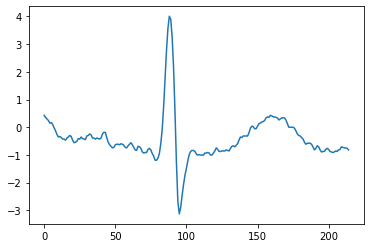

In [17]:
plt.plot(sig_AP[0])

In [22]:
!pip install ecg_plot



You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [11]:
import ecg_plot

In [9]:
len(sig_nor[0])

175

In [84]:
len(n_numpy[0])

301

In [13]:
def scale_data(data, lower=0, upper=1024):
    '''scales passed sequence between thresholds

    Function that scales passed data so that it has specified lower 
    and upper bounds.
    
    Parameters
    ----------
    data : 1-d array or list
        Sequence to be scaled

    lower : int or float
        lower threshold for scaling
        default : 0

    upper : int or float
        upper threshold for scaling
        default : 1024

    Returns
    -------
    out : 1-d array
        contains scaled data

    Examples
    --------
    When passing data without further arguments to the function means it scales 0-1024
    
    >>> x = [2, 3, 4, 5]
    >>> scale_data(x)
    array([   0.        ,  341.33333333,  682.66666667, 1024.        ])

    Or you can specify a range:

    >>> scale_data(x, lower = 50, upper = 124)
    array([ 50.        ,  74.66666667,  99.33333333, 124.        ])
    '''

    rng = np.max(data) - np.min(data)
    minimum = np.min(data)
    data = (upper - lower) * ((data - minimum) / rng) + lower
    return data

In [30]:
n_sum_ts = 0
a_sum_ts = 0
l_sum_ts = 0
r_sum_ts = 0
p_sum_ts = 0

In [31]:
len(sig_nor[4])

284

In [32]:
for i in sig_nor:
    n_sum_ts += len(i)

In [33]:
for i in sig_AP:
    a_sum_ts += len(i)

In [34]:
for i in sig_LBBB:
    l_sum_ts += len(i)

In [35]:
for i in sig_RBBB:
    r_sum_ts += len(i)

In [36]:
for i in sig_PVC:
    p_sum_ts += len(i)

In [37]:
a_sum_ts

538064

In [38]:
print(n_sum_ts / len(sig_nor))
print(a_sum_ts / len(sig_AP))
print(l_sum_ts / len(sig_LBBB))
print(r_sum_ts / len(sig_RBBB))
print(p_sum_ts / len(sig_PVC))

303.5764565992866
272.85192697768764
288.93624382207577
306.6245386091835
243.2090338770389


In [39]:
avg_all_st = (303.5764565992866 + 272.85192697768764 + 288.93624382207577 + 306.6245386091835 + 243.2090338770389)/5

In [40]:
avg_all_st

283.0396399770545

In [41]:
record_time_s = 60 * 30 + 6

In [42]:
record_time_s

1806

In [43]:
sample_per_s = record_time_s / 650000

In [44]:
sample_per_s

0.0027784615384615387

In [45]:
300* sample_per_s

0.8335384615384616

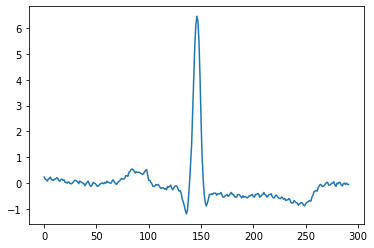

In [46]:
plt.plot(sig_nor[1])


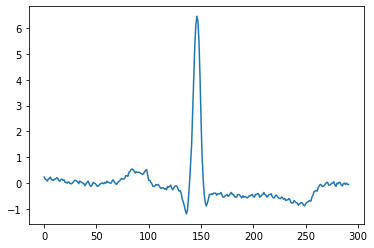

In [47]:
plt.plot(sig_nor[1])


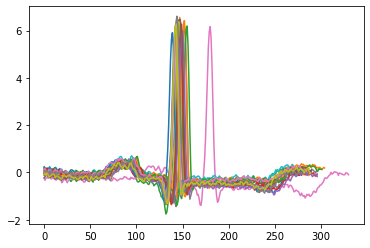

In [48]:
for i in sig_nor[1:20] :
    plt.plot(i)
    

In [50]:
n = []
a = []
p = []
l = []
r = []

In [51]:
for i in sig_nor[1:-1] : 
    si = scipy.signal.resample(i, 300)
    n.append(si.tolist())

In [52]:
for i in sig_AP[1:-1] : 
    si = scipy.signal.resample(i, 300)    
    a.append(si.tolist())

In [53]:
for i in sig_LBBB[1:-1] : 
    si = scipy.signal.resample(i, 300)
    l.append(si.tolist())

In [54]:
for i in sig_RBBB[1:-1] : 
    si = scipy.signal.resample(i, 300)
    r.append(si.tolist())

In [55]:
for i in sig_PVC[1:-1] : 
    si = scipy.signal.resample(i, 300)
    p.append(si.tolist())

In [56]:
len(n)

8408

In [57]:
print(len(l), len(p), len(r), len(n), len(a))

6068 3983 6771 8408 1970


In [58]:
print(len(l), len(p), len(r), len(n), len(a))

6068 3983 6771 8408 1970


In [59]:
from copy import deepcopy

In [60]:
n_copy = deepcopy(n)
l_copy = deepcopy(l)
p_copy = deepcopy(p)
r_copy = deepcopy(r)
a_copy = deepcopy(a)


In [61]:
n_numpy = np.zeros((len(n_copy), len(n_copy[0])+1))
l_numpy = np.zeros((len(l_copy), len(l_copy[0])+1))
p_numpy = np.zeros((len(p_copy), len(p_copy[0])+1))
r_numpy = np.zeros((len(r_copy), len(r_copy[0])+1))
a_numpy = np.zeros((len(a_copy), len(a_copy[0])+1))

In [62]:
l_numpy.shape

(6068, 301)

In [63]:
n_numpy[:, :300]=n_copy
l_numpy[:, :300]=l_copy
p_numpy[:, :300]=p_copy
r_numpy[:, :300]=r_copy
a_numpy[:, :300]=a_copy

In [64]:
n_numpy[:, -1]=0
l_numpy[:, -1]=1
p_numpy[:, -1]=2
r_numpy[:, -1]=3
a_numpy[:, -1]=4

In [65]:
all_len = len(n)+len(l)+len(p)+len(r)+len(a)

In [66]:
all_len

27200

In [67]:
all_len == 6068 +3983+ 6771+ 8408+ 1970

True

In [68]:
all_in_one = np.zeros((all_len, 301))

In [69]:
all_in_one.shape

(27200, 301)

In [70]:
print(n_numpy.shape[0]+1, (n_numpy.shape[0]+l_numpy.shape[0]))

8409 14476


In [71]:
all_in_one[:n_numpy.shape[0],:]=n_numpy
# all_in_one[n_numpy.shape[0]:(n_numpy.shape[0]+l_numpy.shape[0]),:]=l_numpy
# all_in_one[l_numpy.shape[0]:(l_numpy.shape[0]+p_numpy.shape[0]),:]=p_numpy
# all_in_one[p_numpy.shape[0]:(p_numpy.shape[0]+r_numpy.shape[0]),:]=r_numpy
# all_in_one[r_numpy.shape[0]:(r_numpy.shape[0]+a_numpy.shape[0]),:]=a_numpy

In [72]:
all_2 = None

In [73]:
all_2 = np.concatenate((n_numpy, l_numpy))

In [74]:
all_2 = np.concatenate((all_2, p_numpy))

In [75]:
all_2 = np.concatenate((all_2, r_numpy))
all_2 = np.concatenate((all_2, a_numpy))

In [76]:
all_2.shape

(27200, 301)

In [77]:
df = pd.DataFrame(all_2, columns=range(1,302))

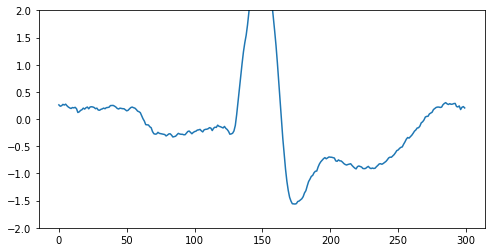

In [78]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.ylim([-2, 2])
ax.plot(l_numpy[100,:-1])
plt.show()

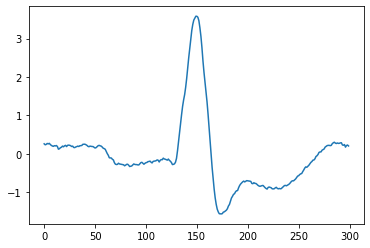

In [79]:
plt.plot(l_numpy[100,:-1])

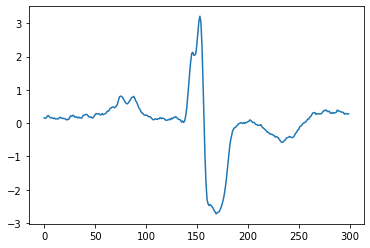

In [80]:
plt.plot(r_numpy[1000,:-1])

In [81]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301
0,0.239643,0.164720,0.137425,0.084942,0.153273,0.184037,0.238504,0.157602,0.127725,0.120196,...,0.013269,-0.090593,-0.083783,-0.010214,0.003538,-0.048281,0.013559,-0.054481,-0.037631,0.0
1,-0.019156,0.056494,0.085993,0.016801,-0.018386,-0.057010,-0.068422,0.026895,-0.014682,-0.062788,...,-0.001479,-0.108656,-0.058153,0.001199,-0.007415,0.059003,-0.032712,-0.101004,-0.121043,0.0
2,-0.070916,-0.072735,-0.068566,-0.088535,-0.195064,-0.250222,-0.174585,-0.172860,-0.113858,-0.149651,...,0.060226,0.045062,0.087087,0.094336,0.015158,0.011150,0.037077,0.060055,0.027918,0.0
3,-0.045036,-0.015860,-0.051289,0.046698,0.046348,-0.004921,-0.084028,-0.172101,-0.150082,-0.089753,...,0.006724,0.015977,0.054514,0.133155,0.123297,0.076452,0.054817,-0.004272,-0.099234,0.0
4,0.006723,0.028755,0.040530,-0.042902,-0.081792,-0.152608,-0.105317,-0.062382,-0.040877,-0.144280,...,0.135370,0.078398,0.127388,0.167807,0.151218,0.076355,0.054625,0.005897,0.060152,0.0


In [235]:
df.to_csv("MIT_BIH_DATASET_Resampled_Filltered_6_2021.csv", index=False)

In [236]:
np.where(l_numpy<0)

(array([   0,    0,    0, ..., 6067, 6067, 6067]),
 array([ 29,  30,  52, ..., 193, 194, 195]))

In [237]:
np.where(all_2<0)

(array([    0,     0,     0, ..., 27199, 27199, 27199]),
 array([ 26,  27,  34, ..., 297, 298, 299]))

In [238]:
np.all(all_2[-1])==np.all(a_numpy[-1])

True

In [239]:
all_in_one[-1].shape

(301,)

In [240]:
a_numpy[-1].shape

(301,)